## Homework 3

Due: 10/30/2024 8:30 AM 

# Nolan Yager

Machine Learning Fall 2024

# Preparation

1. Create a 'code' folder in the root directory of your repository.
1. Inside the 'code' folder, create a file '01_clean_data.\<your_extension_here\>'.
Your extension should be the one you use for your programming language of choice (e.g., '.R' for R, '.py' for Python, '.jl' for Julia).
1. Copy any code from HW_02 you need to subset and merge the NRI and SVI datasets into the '01_clean_data' file.
1. Add a 'processed' directory to the 'data' folder.
1. Add a line at the end of the file that saves the merged dataset to 'data/processed' directory.
1. Run the '01_clean_data' file to ensure that the merged dataset runs and creates the proper file.
1. Add and commit the '01_clean_data' file to the repository.

In [13]:
# Import Packages: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sklearn 

#Current WD:
import os
cwd = os.getcwd()
print(cwd)

c:\Users\nyager\Desktop\YagerMLCode\MachineLearning_Fall24\homework


# Homework - Principal Component Analysis

The CDC Social Vulnerability Index (SVI) takes multiple differen population-level inputs (e.g., % of the population living in poverty, % of the population without health insurance) to identify particularly vulnerable counties.
While the CDC SVI scores rely on adding up the percentiles of various characteristics, there are alternative indexes (e.g., [University of South Carolina SoVI index](https://sc.edu/study/colleges_schools/artsandsciences/centers_and_institutes/hvri/data_and_resources/sovi/index.php)) that use methods like PCA.
Here, we are going to use the CDC SVI data to create an alternative index based on PCA.

In [5]:
# Loading merged data
merged_data = pd.read_csv("data/processed/nri_svi_merged.csv")

1. The following variables are used in the SVI:
`EP_POV150, EP_UNEMP, EP_HBURD, EP_NOHSDP, EP_UNINSUR, EP_AGE65, EP_AGE17, EP_DISABL, EP_SNGPNT, EP_LIMENG, EP_MINRTY, EP_MUNIT, EP_MOBILE, EP_CROWD, EP_NOVEH, EP_GROUPQ, EP_NOINT`
    a. Subset the merged dataset to only include the variables above and look at the pattern of missing data.
    Are missing observations scattered throughout the data or are entire rows or columns missing?
    b. PCA cannot handle missing values by default.
    There are several options for handling missing data generally, including imputation, removing rows with missing data, or removing columns with missing data.
    Deal with the missing data in a way that makes sense for the pattern of missing data and the goals of the analysis. Explain why you made this decision.
    _Note: How you handle this is specific to the missing data pattern and the goals of the analysis.
    For example, when entire rows or columns are missing, imputation may not be appropriate and dropping those rows or columns is usually the best option.
    Conversely, if you have a general missingness pattern where missing observations are scattered throughout the data, imputation is likely the best option._
    c. After dealing with the missing data, perform PCA on the SVI variables.

In [9]:
# Subsetting merged dataset by identifying columns of interest

# Define the columns 
svi_columns = [
    'EP_POV150', 'EP_UNEMP', 'EP_HBURD', 'EP_NOHSDP', 'EP_UNINSUR', 
    'EP_AGE65', 'EP_AGE17', 'EP_DISABL', 'EP_SNGPNT', 'EP_LIMENG', 
    'EP_MINRTY', 'EP_MUNIT', 'EP_MOBILE', 'EP_CROWD', 'EP_NOVEH', 
    'EP_GROUPQ', 'EP_NOINT'
]

# Subset the merged_data to include columns of interest
subset_merged_data = merged_data[svi_columns]

# Displaying missing data 
missing_counts = subset_merged_data.isnull().sum()
print("Missing data per column:\n", missing_counts)



Index(['FIPS', 'AVLN_AFREQ', 'AVLN_RISKR', 'CFLD_AFREQ', 'CFLD_RISKR',
       'CWAV_AFREQ', 'CWAV_RISKR', 'DRGT_AFREQ', 'DRGT_RISKR', 'ERQK_AFREQ',
       'ERQK_RISKR', 'HAIL_AFREQ', 'HAIL_RISKR', 'HWAV_AFREQ', 'HWAV_RISKR',
       'HRCN_AFREQ', 'HRCN_RISKR', 'ISTM_AFREQ', 'ISTM_RISKR', 'LNDS_AFREQ',
       'LNDS_RISKR', 'LTNG_AFREQ', 'LTNG_RISKR', 'RFLD_AFREQ', 'RFLD_RISKR',
       'SWND_AFREQ', 'SWND_RISKR', 'TRND_AFREQ', 'TRND_RISKR', 'TSUN_AFREQ',
       'TSUN_RISKR', 'VLCN_AFREQ', 'VLCN_RISKR', 'WFIR_AFREQ', 'WFIR_RISKR',
       'WNTW_AFREQ', 'WNTW_RISKR', 'ST', 'STATE', 'ST_ABBR', 'STCNTY',
       'COUNTY', 'LOCATION', 'AREA_SQMI', 'E_TOTPOP', 'EP_POV150', 'EP_UNEMP',
       'EP_HBURD', 'EP_NOHSDP', 'EP_UNINSUR', 'EP_AGE65', 'EP_AGE17',
       'EP_DISABL', 'EP_SNGPNT', 'EP_LIMENG', 'EP_MINRTY', 'EP_MUNIT',
       'EP_MOBILE', 'EP_CROWD', 'EP_NOVEH', 'EP_GROUPQ', 'EP_NOINT', 'EP_AFAM',
       'EP_HISP', 'EP_ASIAN', 'EP_AIAN', 'EP_NHPI', 'EP_TWOMORE',
       'EP_OTHERRACE'],
      

d. PCA cannot handle missing values by default.
    There are several options for handling missing data generally, including imputation, removing rows with missing data, or removing columns with missing data.
    Deal with the missing data in a way that makes sense for the pattern of missing data and the goals of the analysis. Explain why you made this decision.
    _Note: How you handle this is specific to the missing data pattern and the goals of the analysis.
    For example, when entire rows or columns are missing, imputation may not be appropriate and dropping those rows or columns is usually the best option.
    Conversely, if you have a general missingness pattern where missing observations are scattered throughout the data, imputation is likely the best option._
   

MY STRATEGY: 
Note that I will be using imputation. As we can see above, we have about 96 values missing from quite a few different columns, so if we dropped all those columns we'd lose way more data than we need to. I suspect that what happened was perhaps an error when merging the data. But since this homework is about imputing data, I'm not going to go back and fix it, I'll impute here. 

In [15]:
# Using SciKit-Learn imputer
from sklearn.impute import SimpleImputer

# Creating an imputer, we will call it imputer and just use the mean for our strategy 
imputer = SimpleImputer(strategy='mean')

# Fit and transform the subset data
subset_data_imputed = pd.DataFrame(imputer.fit_transform(subset_merged_data), columns=subset_merged_data.columns)

# Check to confirm missing values are addressed
print(subset_data_imputed.isnull().sum())


EP_POV150     0
EP_UNEMP      0
EP_HBURD      0
EP_NOHSDP     0
EP_UNINSUR    0
EP_AGE65      0
EP_AGE17      0
EP_DISABL     0
EP_SNGPNT     0
EP_LIMENG     0
EP_MINRTY     0
EP_MUNIT      0
EP_MOBILE     0
EP_CROWD      0
EP_NOVEH      0
EP_GROUPQ     0
EP_NOINT      0
dtype: int64


f. After dealing with the missing data, perform PCA on the SVI variables.

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(subset_data_imputed)  

# 2. It's PCA time
pca = PCA()  
svi_pca = pca.fit_transform(data_scaled)

# Converting result back to a dataframe 
pca_df = pd.DataFrame(svi_pca, columns=[f'PC{i+1}' for i in range(svi_pca.shape[1])])

# 3. Examine explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:\n", explained_variance)

Explained variance by each component:
 [0.28225876 0.19170644 0.1082785  0.06803159 0.05928892 0.05720244
 0.0364465  0.03425511 0.02952363 0.02625225 0.02459307 0.02137741
 0.0170073  0.01445149 0.01161105 0.0093596  0.00835596]


2. Plot the eigenvectors or loadings associated of the first three principal components.
Make sure that the axis labels correspond to the variable names and not the indices of the variables.
How would you interpret the first three prinicpal components?
_Note: you can find the documentation for the SVI variables [here](https://www.atsdr.cdc.gov/placeandhealth/svi/documentation/SVI_documentation_2022.html)._

Variable names in the dataset:
Index(['EP_POV150', 'EP_UNEMP', 'EP_HBURD', 'EP_NOHSDP', 'EP_UNINSUR',
       'EP_AGE65', 'EP_AGE17', 'EP_DISABL', 'EP_SNGPNT', 'EP_LIMENG',
       'EP_MINRTY', 'EP_MUNIT', 'EP_MOBILE', 'EP_CROWD', 'EP_NOVEH',
       'EP_GROUPQ', 'EP_NOINT'],
      dtype='object')


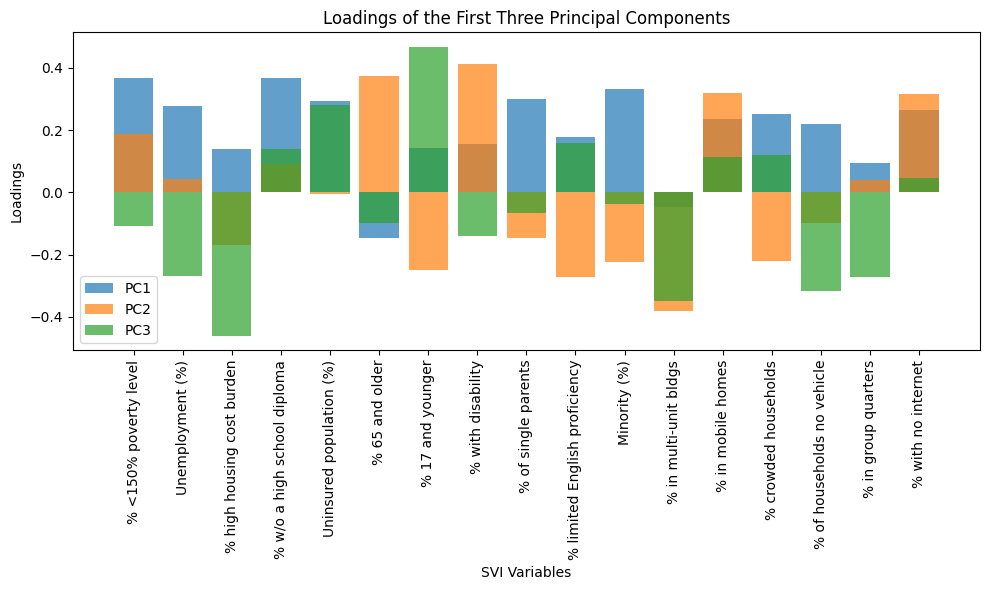

In [29]:
# Extracting the loadings for first three principal components
loadings = pca.components_[:3]  # First three principal components
variables = subset_data_imputed.columns  # Original variable names

# Display variable names
print("Variable names in the dataset:")
print(variables)

# Creating variable labels (I asked ChatGPT 4o to guess what these are and create labels, interested to see how close it got to the real names)
variable_labels = {
    'EP_POV150': '% <150% poverty level',
    'EP_UNEMP': 'Unemployment (%)',
    'EP_HBURD': '% high housing cost burden',
    'EP_NOHSDP': '% w/o a high school diploma',
    'EP_UNINSUR': 'Uninsured population (%)',
    'EP_AGE65': '% 65 and older',
    'EP_AGE17': '% 17 and younger',
    'EP_DISABL': '% with disability',
    'EP_SNGPNT': '% of single parents',
    'EP_LIMENG': '% limited English proficiency',
    'EP_MINRTY': 'Minority (%)',
    'EP_MUNIT': '% in multi-unit bldgs',
    'EP_MOBILE': '% in mobile homes',
    'EP_CROWD': '% crowded households',
    'EP_NOVEH': '% of households no vehicle',
    'EP_GROUPQ': '% in group quarters',
    'EP_NOINT': '% with no internet'
}



# Mapping original variable names to their descriptive names
descriptive_labels = [variable_labels[var] for var in variables]

# Now plotting with descriptive labels
plt.figure(figsize=(10, 6))
for i, pc in enumerate(loadings):
    plt.bar(descriptive_labels, pc, alpha=0.7, label=f'PC{i+1}')
plt.xticks(rotation=90)
plt.xlabel('SVI Variables')
plt.ylabel('Loadings')
plt.title('Loadings of the First Three Principal Components')
plt.legend()
plt.tight_layout()
plt.show()


3. There are several different ways to determine the number of principal components to retain.
One common method is to retain principal components that explain a certain percentage of the variance in the data.
    a. How many principal components are needed to explain 80% of the variance in the data?
    a. How many principal components are needed to explain 90% of the variance in the data?

In [22]:
# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components needed for 80% and 90% of variance, respectively: 
components_80_pct = np.argmax(cumulative_variance >= 0.80) + 1
components_90_pct = np.argmax(cumulative_variance >= 0.90) + 1

# Printing answer:
print(f"Number of components needed to explain 80% of variance: {components_80_pct}")
print(f"Number of components needed to explain 90% of variance: {components_90_pct}")


Number of components needed to explain 80% of variance: 7
Number of components needed to explain 90% of variance: 11


4. An alternative approach is to plot the eigenvalues of the principal components and retain the components that are above the "elbow" in the plot. In other words the eigenvalues that are substantially larger than the rest.
    a. Create a [scree plot](https://en.wikipedia.org/wiki/Scree_plot) of the eigenvalues of the principal components.
    a. How many principal components should be retained based on the scree plot? This video may help: [PCA Scree Plot](https://youtu.be/vFUvNICWVz4?si=6NbyRcLRGT8L1HzI)

5. Cross-validation is another method to determine the number of principal components to retain.
This process requires some linear algebra that is beyond the scope of this course.
As such, I have written example [code](https://github.com/gabehassler/PRGS-Intro-to-ML-2024/blob/main/examples/pca_cross_validation.jl) in Julia that demonstrates how to perform cross-validation.
This procedure is a simplified versionof an approach explained in this [blog post](https://alexhwilliams.info/itsneuronalblog/2018/02/26/crossval/).
For the purposes of this assignment, the `pca_cv_error` function is a black box that returns the cross-validation error for a given number of principal components.
_Note: If you use a different programming language, you can use ChatGPT to translate the code to your language of choice._
    a. Compute the cross-validation error for 1 to 17 principal components. If this process is parallelizable, parallelize the code. If setting a random number seed would make this work more reproducible, set a random number seed.